<a href="https://colab.research.google.com/github/arthur12345678952/Machine-Learning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment1

[51.94345057  1.62218727]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


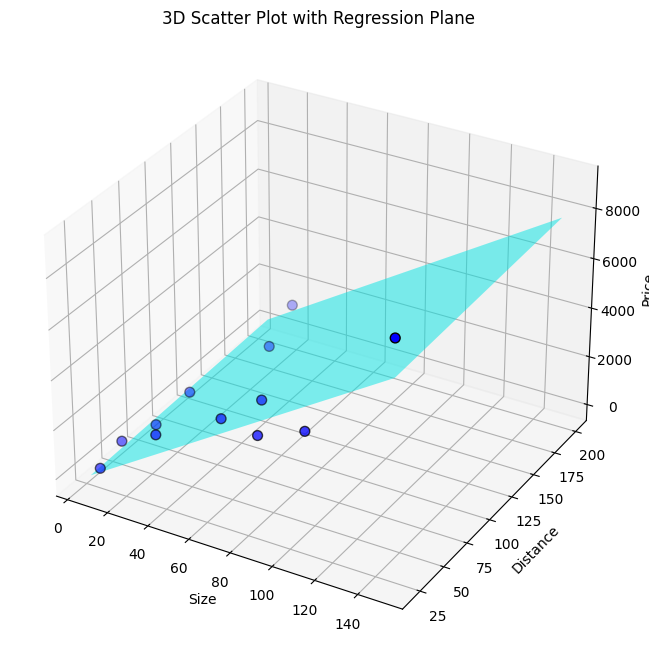

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Data preparation
size = [5, 10, 12, 14, 18, 30, 33, 55, 65, 80, 100, 150]
distance = [50, 20, 70, 100, 200, 150, 30, 50, 70, 35, 40, 20]
price = [300, 400, 450, 800, 1200, 1400, 2000, 2500, 2800, 3000, 3500, 9000]

series_dict = {'X1': size, 'X2': distance, 'y': price}
df = pd.DataFrame(series_dict)

# Create feature matrix X and target vector y
X = df[['X1', 'X2']]
y = df['y']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
print(model.coef_)

# Generate a meshgrid for the feature space
x1_range = np.linspace(df['X1'].min(), df['X1'].max(), 10)
x2_range = np.linspace(df['X2'].min(), df['X2'].max(), 10)
x1, x2 = np.meshgrid(x1_range, x2_range)
x1_flat = x1.flatten()
x2_flat = x2.flatten()
X_flat = np.vstack((x1_flat, x2_flat)).T

# Predict prices using the linear regression model
y_pred_flat = model.predict(X_flat)
y_pred = y_pred_flat.reshape(x1.shape)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['X1'], df['X2'], df['y'], color='b', edgecolor='k', s=50)

# Surface plot for regression plane
ax.plot_surface(x1, x2, y_pred, color='cyan', alpha=0.5, rstride=100, cstride=100)

# Setting labels
ax.set_xlabel('Size')
ax.set_ylabel('Distance')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot with Regression Plane')

plt.show()
